# A Study of Water Potability

An attempt on understanding what makes water potable based on 10 different numerical features. The water_potability.csv file contains water quality metrics for 3276 different water bodies and It's source can be found here: https://www.kaggle.com/datasets/adityakadiwal/water-potability?datasetId=1292407&sortBy=voteCount

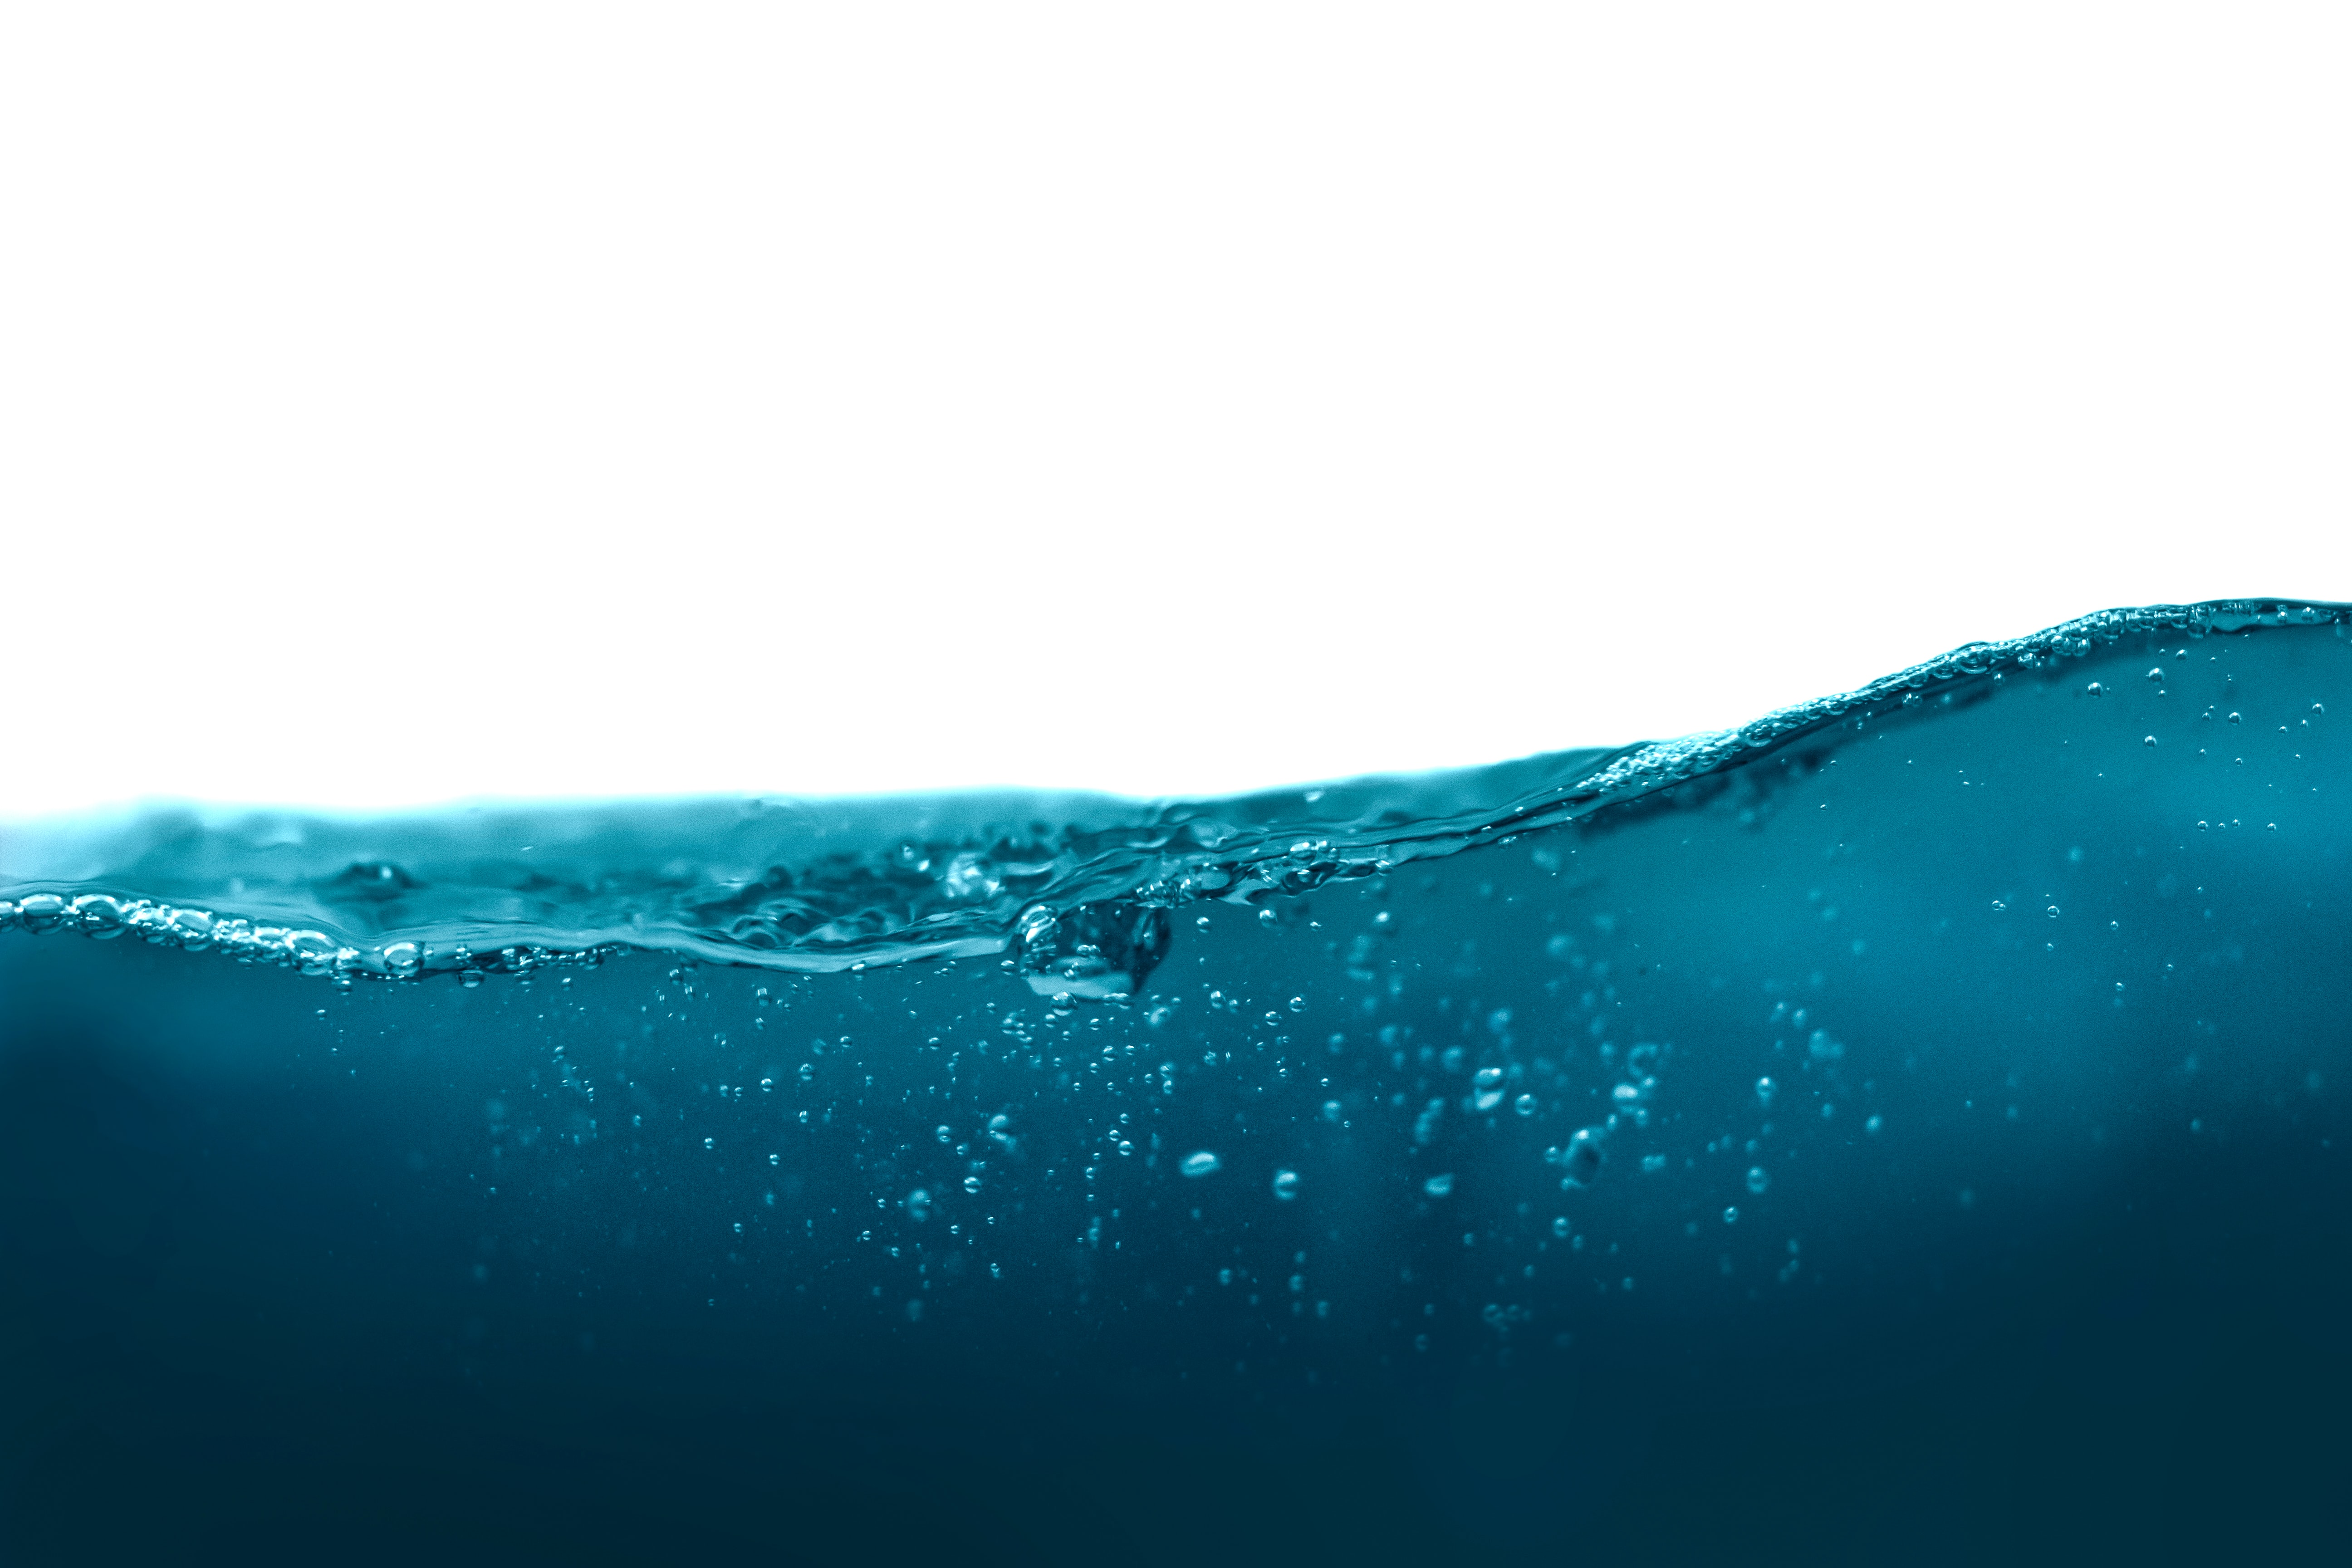

Foto de Daniel Sinoca en Unsplash.

## Feature Definitions:



**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

# 0.1 Import Libraries & Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
# set seed
seed = 42
np.random.seed(seed)

# Import and show data.
file = 'data/water_potability.csv'
data = pd.read_csv(file)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# 1.0 Exploratory Data Analysis

## 1.1 Quick Descriptive Statistics

We will be exploring general characteristics for the data. Things like type and name of each variable, missing values, dimensions of the data, and more. 

In [3]:
# Show data types, nulls, features, and dimensions.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
# Percentage of missing values.
print('Percentage of missing values for each variable:')
data.isnull().sum()/data.shape[0]

Percentage of missing values for each variable:


ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

We can see how each variable has a different rnge of values when describing the potability of a body of water. This is important because it will determine the neccesary transformations on the data to create an accurate predictive model. It is important to note that the variables: ph, sulfate, and trihalomethanes present a significant amount of missing values that will need to be addressed. 

## 1.2 Data Distributions

By visualazing the distributions of each independent variables we are able to hve a more accurate understanding of the relationship between the respective dependent variable. We will make two plots: one for the entire data, and the other for each variable conditioned on its label. 

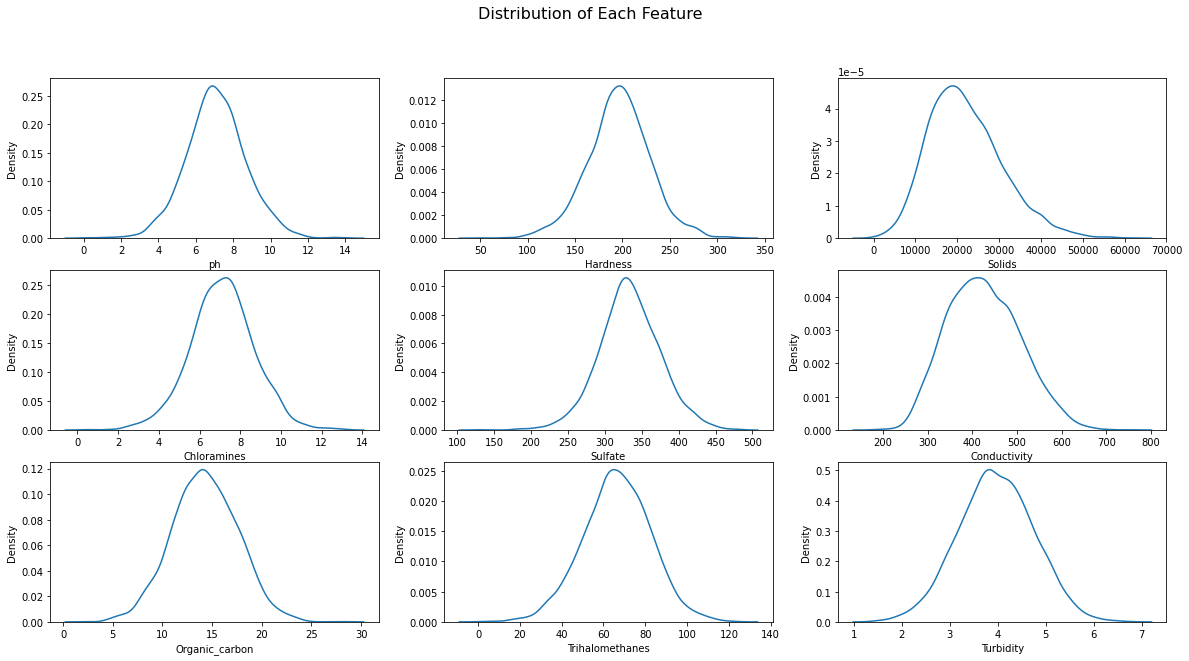

In [6]:
# Plot Features Distributions
fig, axs = plt.subplots(3,3)
fig.suptitle('Distribution of Each Feature', fontsize=16)
for i in range(data.shape[1]-1):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data[data.columns[i]])
    

We can see that most variables are already normally distributed with solids having a slight skew to the right. This is important to know when deciding which predictive model to use as some of them make normality of independent variables an assumption to work. We will now visualize the conditional probability.

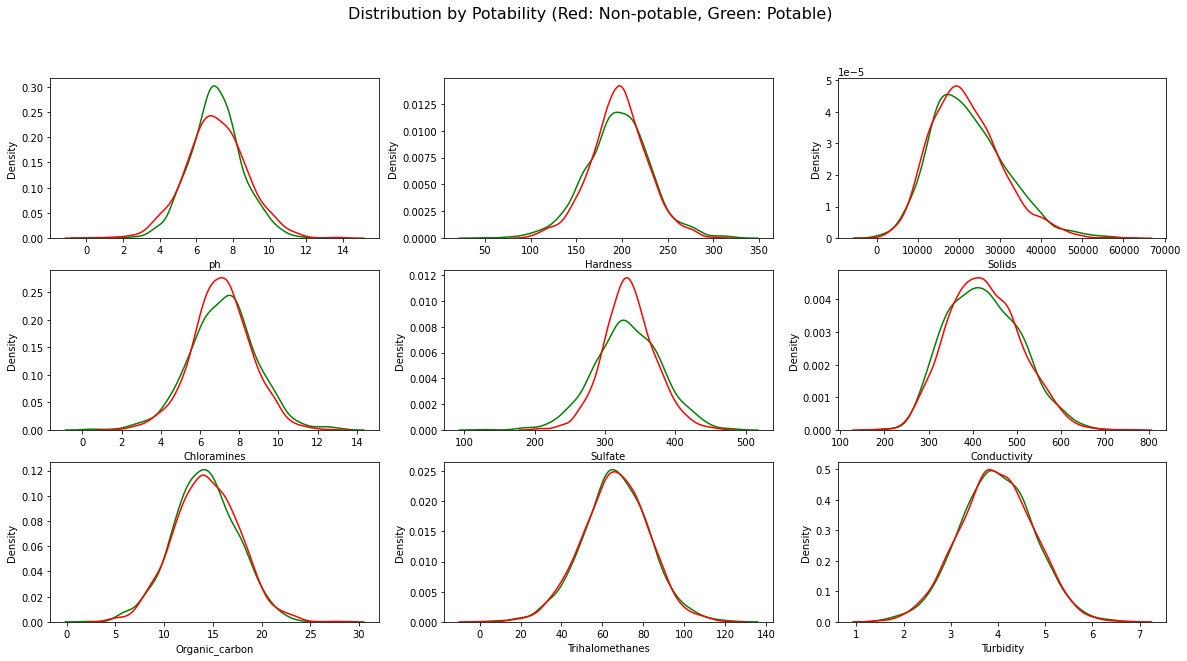

In [7]:
# Plot Features Distributions
fig, axs = plt.subplots(3,3)
fig.suptitle('Distribution by Potability (Red: Non-potable, Green: Potable)', fontsize=16)
df_pot = data[data['Potability']==1]
df_non_pot = data[data['Potability']==0]

for i in range(data.shape[1]-1):
    plt.subplot(3,3,i+1)
    pot_var, non_pot_var = df_pot[data.columns[i]], df_non_pot[data.columns[i]]
    sns.kdeplot(data=pot_var,color='green')
    sns.kdeplot(data=non_pot_var, color='red')

We do this to gain some insights between the dependent and independent variables. We can see how some variables conditional distribution remains the same regardless of class, but others change slightly like ph, sulfate, or hardiness. Overall the differences seem to be small which might represent a challenge when trying to predict new data. 

Another way to gain insight on the variables relationship and a good method to check for multicollinearity is to do a correlation plot. 

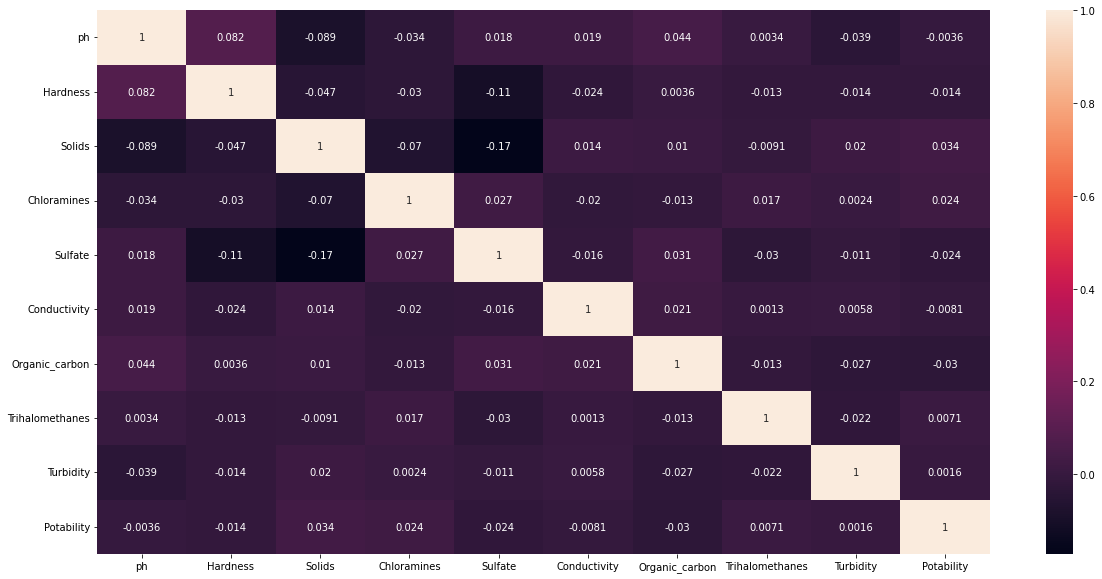

In [8]:
#Feature correlation
corr_heat = sns.heatmap(data.corr(),annot=True)

In it we can see the correlation between all the variables. In this case we cn see that there are no strong relationships in any of them. The good side of this is that we don't have to worry about the model being affected by linear relationships between independent variables, the bad is that it might be hard predicting the test datas class due to the lack of relationship with the dependent variable.

## 1.3 Outlier Detection

We will use boxplots for each variable to have a visual intuition for ech variables deviations. This will help gain insight on the necessary transformations for modeling.

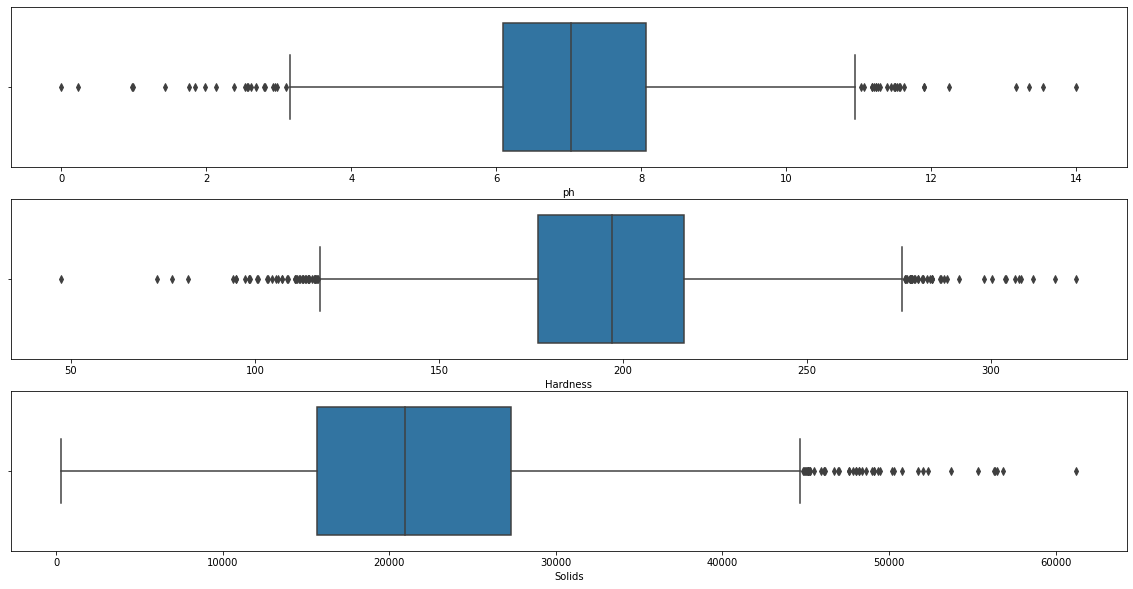

In [9]:
# Outlier detection
fig, axs = plt.subplots(3,3)
for i in range(3):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=data[data.columns[i]])

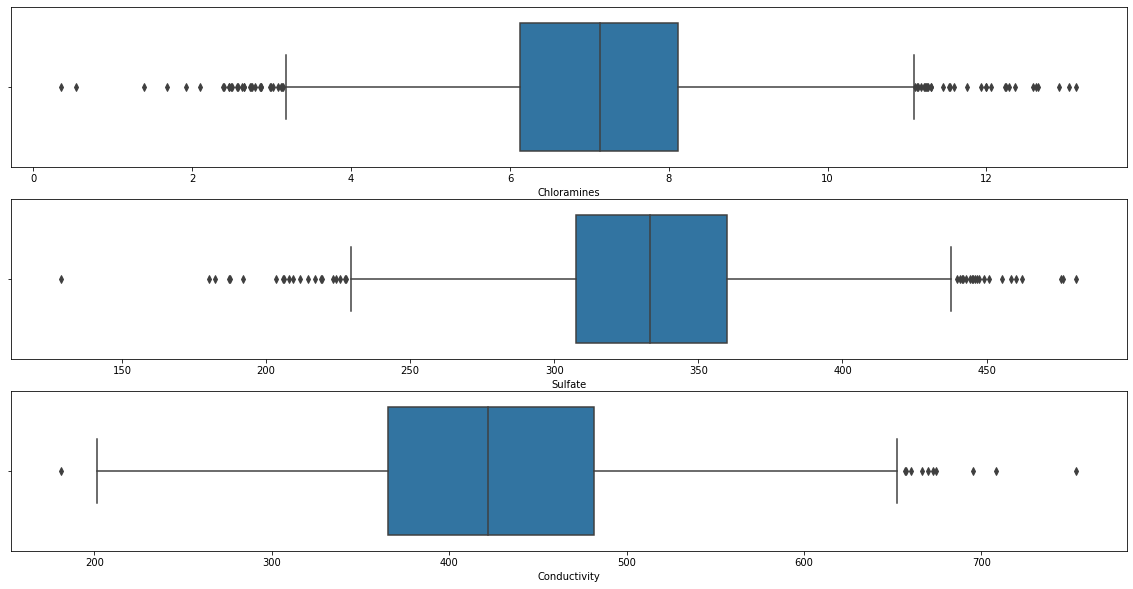

In [10]:
fig, axs = plt.subplots(3,3)
for i in range(3):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=data[data.columns[i+3]])

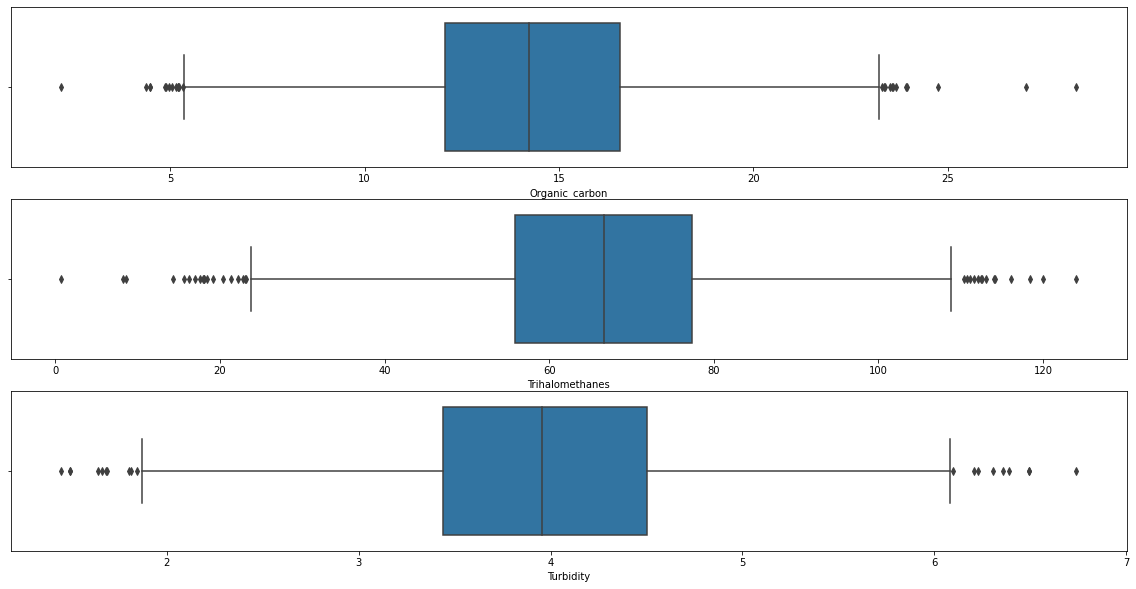

In [11]:
fig, axs = plt.subplots(3,3)
for i in range(3):
    plt.subplot(3,1,i+1)
    sns.boxplot(x=data[data.columns[i+6]])

We can see that a lot of variables present a significant number of outliers. We will either need to make transformations for each variable or select a model robust to outliers. 

## 1.4 Check Data for Imbalance & Split Into Train/Test

In [12]:
# Distribution of dependent variable.
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

We can see how there exists a slight imbalance between the 2 classes in our data, this might be important to take into account when building our model. 

We will now split our data to have a training and test set. We will do this by first separating it the data points with missing values and splitting the rest. We will then combine the newly formed training set with the data points with missing values. This will prevent data leakage into the test set. 

In [13]:
# Separate missing data from complete data for splitting before preprocessing.
complete_data = data.dropna()
incomplete_data = data[data.isnull().any(axis=1)]

In [14]:
# SPlit data
X, y = complete_data.loc[:, complete_data.columns != 'Potability'], complete_data['Potability']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=seed)
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
904,5.949519,160.442631,16898.808297,6.045906,367.328542,451.012788,16.359951,62.368234,4.072198
1729,5.345345,238.510230,10315.353973,7.822601,281.771707,496.350875,12.624613,87.342833,2.362886
3047,5.039407,194.404170,19336.608073,7.194765,339.232126,515.807182,10.728669,61.129517,3.126956
2206,8.801934,225.895468,23659.211520,2.458609,408.417866,446.992465,14.340818,42.800911,3.769832
2131,7.191962,228.409943,15395.469082,7.398603,334.777619,294.915584,13.932293,50.748365,4.102719


# 2.0 Data Transformation 

We will now make some of the necessary transformations to the data needed to build an optimized model. We will start by rejoining the missing data with the training dataset as well as confirming the missing values in our training data.

In [15]:
# Create new data frame with complete trainin examples and data points with missing values.
X_train['Potability'] = y_train
new_df = pd.concat([X_train,incomplete_data])

# Display percentage of missing values
print('Percentage of missing values for each variable:')
new_df.isnull().sum()/new_df.shape[0] * 100

Percentage of missing values for each variable:


ph                 18.375749
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            29.229042
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     6.062874
Turbidity           0.000000
Potability          0.000000
dtype: float64

## 2.1 Addressing Missing Values

We will impute the missing values using the mean for each variable. This seems to be acceptable given the distribution of each.

In [16]:
#Replace null values based on the group/sample mean

new_df['ph']= new_df['ph'].fillna(new_df.groupby(['Potability'])['ph'].transform('mean'))
new_df['Sulfate']= new_df['Sulfate'].fillna(new_df.groupby(['Potability'])['Sulfate'].transform('mean'))
new_df['Trihalomethanes']=new_df['Trihalomethanes'].fillna(new_df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

print('Number of missing values:')
new_df.isnull().sum()

Number of missing values:


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## 2.2 Separating Training Data

Finally we will separate our dependent value and output the value count for the training and test data in preparation of building our model. 

In [17]:
# Declare new training data. 

new_X_train, new_y_train = new_df.loc[:, new_df.columns != 'Potability'], new_df['Potability']
print('Training Data Class Distribution:')
print(new_y_train.value_counts(),'\n')
print('Test Data Class Distribution:')
print(y_test.value_counts())


Training Data Class Distribution:
0    1643
1    1029
Name: Potability, dtype: int64 

Test Data Class Distribution:
0    355
1    249
Name: Potability, dtype: int64


## 2.3 (Optional) Data Augmentation

In case we wanted to perform data augmentation there are methods that allows us to balance our data. It is important to note that this does not always help boosting the results of our model due to the nature of creating artificial data, but at least it is an option to consider for some cases. 

In [18]:
# Augment data with resampling and plot new distribution of points.
from sklearn.utils import resample, shuffle
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import NearMiss

In [19]:
sm = SVMSMOTE(random_state=seed)
X_res, y_res = sm.fit_resample(new_X_train,new_y_train)

In [20]:
y_res.value_counts()


0    1643
1    1643
Name: Potability, dtype: int64

# 3.0 Model Building & Validation

In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb

Due to the existance of outliers and we will be using random forest and extreme gradient boosting as possible models to make our prediction. Both are robust to outliers and provide a good general approach. We will also perform cross-validation on the training set to find which one is better.

In [22]:
#Build models
xg_model = xgb.XGBClassifier(use_label_encoder=False,random_state=seed)
rf_model = RandomForestClassifier(random_state=seed)

# XGboost Cross-Validation
param_grid = {'n_estimators':[50,100,200,250,300,500,700]}
grid_xg = RandomizedSearchCV(xg_model, param_grid, scoring='roc_auc',n_jobs=-1,random_state=seed)

# Random Forest Cross-Validation
params_rf = {'n_estimators':[100,200,250,300,500,700]}
grid_rf = RandomizedSearchCV(rf_model, params_rf,scoring='roc_auc',n_jobs=-1, random_state=seed)


In [23]:
grid_xg.fit(new_X_train,new_y_train)
grid_rf.fit(new_X_train,new_y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'n_estimators': [100, 200, 250, 300,
                                                         500, 700]},
                   random_state=42, scoring='roc_auc')

In [24]:
#Get best CV score and best parameters
print('AUC score for XGboost:\n{}'.format(grid_xg.best_score_),grid_xg.best_params_)
print('\nAUC score for Random Forest:\n{}'.format(grid_rf.best_score_),grid_rf.best_params_)

AUC score for XGboost:
0.8257679324469344 {'n_estimators': 50}

AUC score for Random Forest:
0.8352921465314781 {'n_estimators': 700}


Out of the two approaches, random forest proved to be the best. We will now be using it to predict our test data and evaluate our results. 

# 4.0 Results

In [25]:
# Import metrics object from helpers file.
from helpers import metrics

## 4.1 Building & Fitting our Optimal Model

We will now build our model and predict our test data.

In [26]:
# Build optimal model
final_model = RandomForestClassifier(random_state=seed).fit(new_X_train,new_y_train)

# Make our prediction on the test data
prediction = final_model.predict(X_test)
probabilities = final_model.predict_proba(X_test)

## 4.2 Model Result Metrics

By using the metrics object from our helper file, we will able to get our metrics in a fast and efficient way. 

In [27]:
# Fit metrics object with probabilities and actual predicted class.
results = metrics(y_test, prediction, probabilities)

In [28]:
results.report()

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       355
           1       0.72      0.51      0.60       249

    accuracy                           0.72       604
   macro avg       0.72      0.69      0.69       604
weighted avg       0.72      0.72      0.71       604



Looking at our classification report we can see that we have achieved a 72% accuracy. As we saw in our exploratory stage, this might be due to the independent variables not having an explanatory relationship with the dependent variable. Nonetheless, the model could still be improved if more data is collected or more in-depth transformations are made. 

Other important metrics to look at are recall and precision for the potable class of water. In this case we need to prioritize precision as the cost of predicting a non-potable source of water as potable could have adverse effects on the health of however decides to drink that water. In this case that metric could be improved. 

### 4.21 ROC Curve

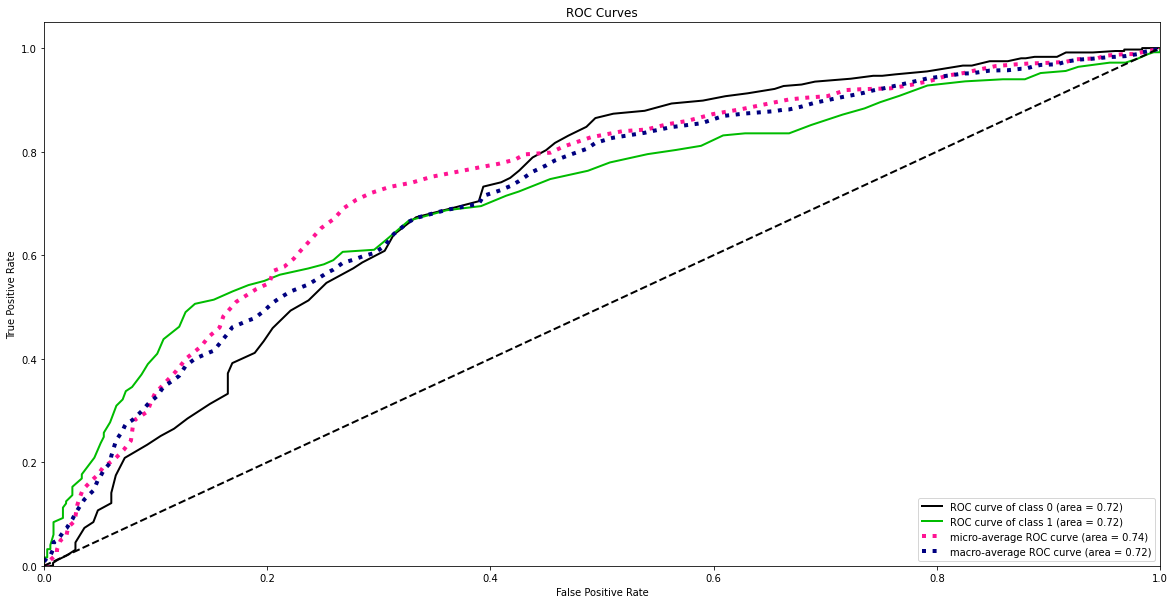

In [29]:
results.roc()

The AUC score ends up being 0.72 for both classes, same performance as the precision and accuracy of our model. 

### 4.22 Confusion Matrix

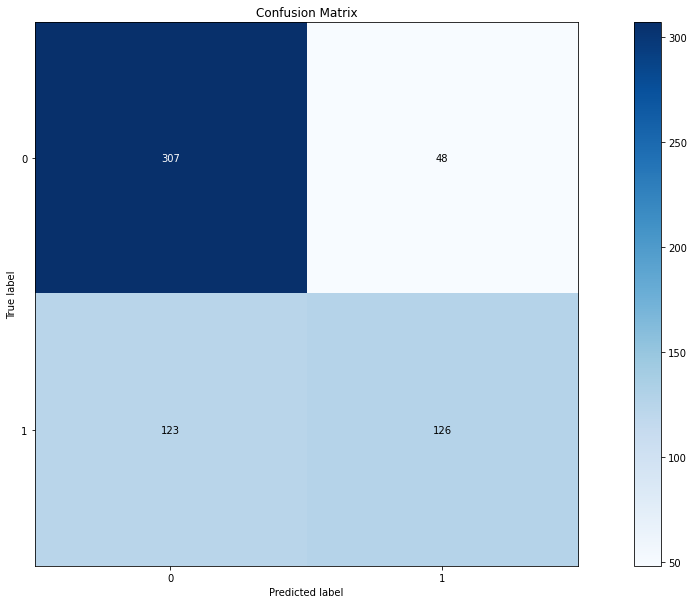

In [30]:
results.confusion()

Finally, we are able to visualize our confusion matrix. Showing the overral performance on our test data.

# 5.0 Conclusions

The data has proven to be a challenge due to the lack of relationship between the independent variables and the class of each data point. The number of missing values and outliers has also proven to be a factor in reducing the accuracy of our results. Nonetheless, a 72% accuracy has been achieved which proves to be a good initial result which can be increased by taking a number of measures. Overall, this exercise serves as good practice in the exploration of data for predictive purposes, and demonstrates that not always there will be a perfect result when building statistical models. 

## 5.1 Variable Importance

Due to the high imputation number of values in the sulfate and ph variables, this might have artificially inflated its importance when plotting the following graph. Nonetheless, it still provides a good general insight on what should be taken into account when trying to determine water potability.

Text(0.5, 1.0, 'Feature Explanation of Potability')

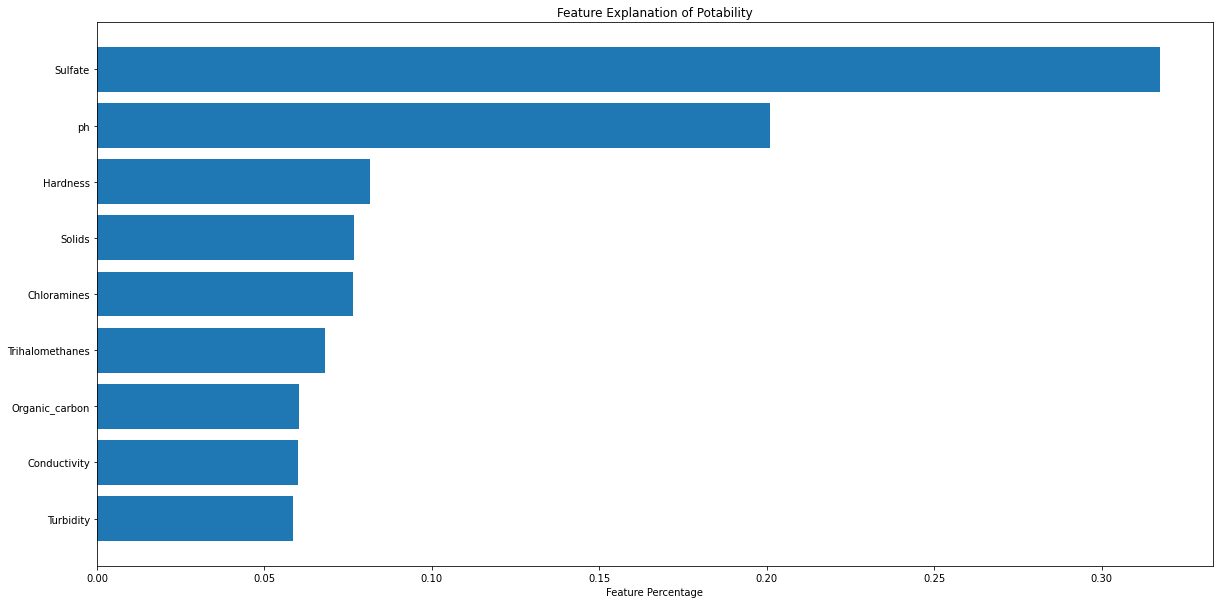

In [31]:
feature_importance = final_model.feature_importances_
names = final_model.feature_names_in_

feature_importance, names = zip(*sorted(zip(feature_importance, names),reverse=True))

fig, ax = plt.subplots()
ax.barh(range(len(names)), feature_importance)
ax.set_yticks(range(len(names)), labels=names)

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Percentage')
ax.set_title('Feature Explanation of Potability')